In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time
from itertools import product
from joblib import Parallel, delayed
from operator import itemgetter
import sncosmo
import shutil
import copy

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
path = os.path.dirname(os.getcwd())
os.chdir(path)
from Emulator.Classes.AllData import AllData
from Emulator.Classes.LightCurve import utkarshGrid, LightCurve
from Emulator.Classes.GP import GP
from Emulator.Classes.GP2D import GP2D
from Emulator.Classes.GP5D import GP5D
os.chdir(os.getcwd() + "/Emulator")
os.getcwd()

'/Users/utkarsh/PycharmProjects/KilonovaeLightCurves/Emulator'

In [3]:
comp_list = np.arange(1, 2156, 44)
pca_diff_list = []

In [4]:
# for n_comp in tqdm(comp_list):
curr_wv = np.arange(100, 3600, 10)
set_skip_factor = None
gpSplit = 1
mejdyn = 0.01
mejwind =  0.13
phi = 90
iobs = 1
mejdyn2 = copy.deepcopy(mejdyn)
mejwind2 = copy.deepcopy(mejwind)
phi2 = copy.deepcopy(phi)
iobs2 = copy.deepcopy(iobs)

gp = GP5D("Classes/reference.csv")
gp.delete_folder_files("data/pcaComponents")
gp.delete_folder_files("data/pcaComponentsTrained")
gp.delete_folder_files("data/pcaComponentsTrainedError")
gp.delete_folder_files("data/pcaTrained")
gp.delete_folder_files("data/pcaTrainedUpper")
gp.delete_folder_files("data/pcaTrainedLower")
gp.split = gpSplit
gp.emulator = "start"
# gp.cross_validation = (mejdyn, mejwind, phi, iobs)
gp.set_wv_range(curr_wv)
gp.n_comp = 2156
time_shape = None 
gp.save_pca_components(skip_factor = set_skip_factor)
gp.setXY_cross_validation(mejdyn, mejwind, phi, iobs)
gp.copytree("data/pcaComponents","data/pcaComponentsTrained")
gp.cross_validation = (mejdyn, mejwind, phi, iobs)
gp.save_trained_data()
gp.ComputeDifferenceFlux()
# pca_diff_list.append(np.mean(np.abs(gp.difference)))

[STATUS] Setting X, Y components for 5D Model.


In [6]:
# plt.figure(dpi = 300, figsize = (4,3))
# plt.plot(comp_list, pca_diff_list, color = "green")
# plt.xscale("log")
# plt.ylabel("Average Fractional Flux Error")
# plt.xlabel("PCA Components")
# utkarshGrid()
# plt.savefig("pca.png")

=== Flux Estimation === 
mejdyn: 0.01
mejwind: 0.13        
phi: 90
viewing_angle: 1
wavelength: 250nm        
time: 2.0 days

LOG FLUX: -4.8531


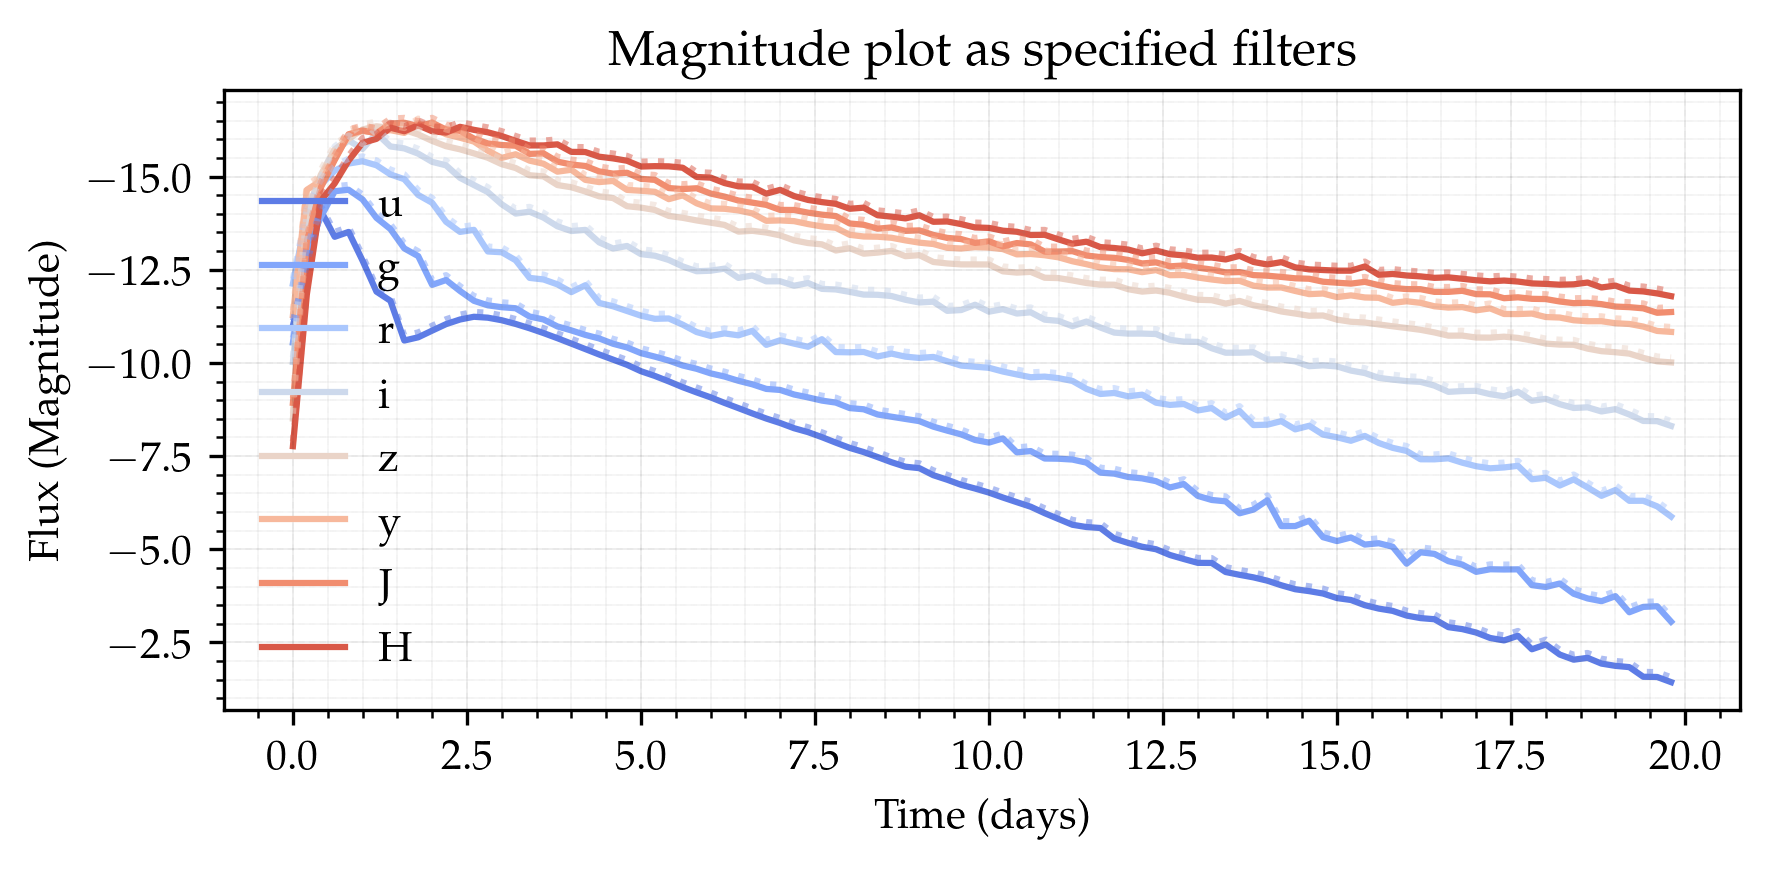

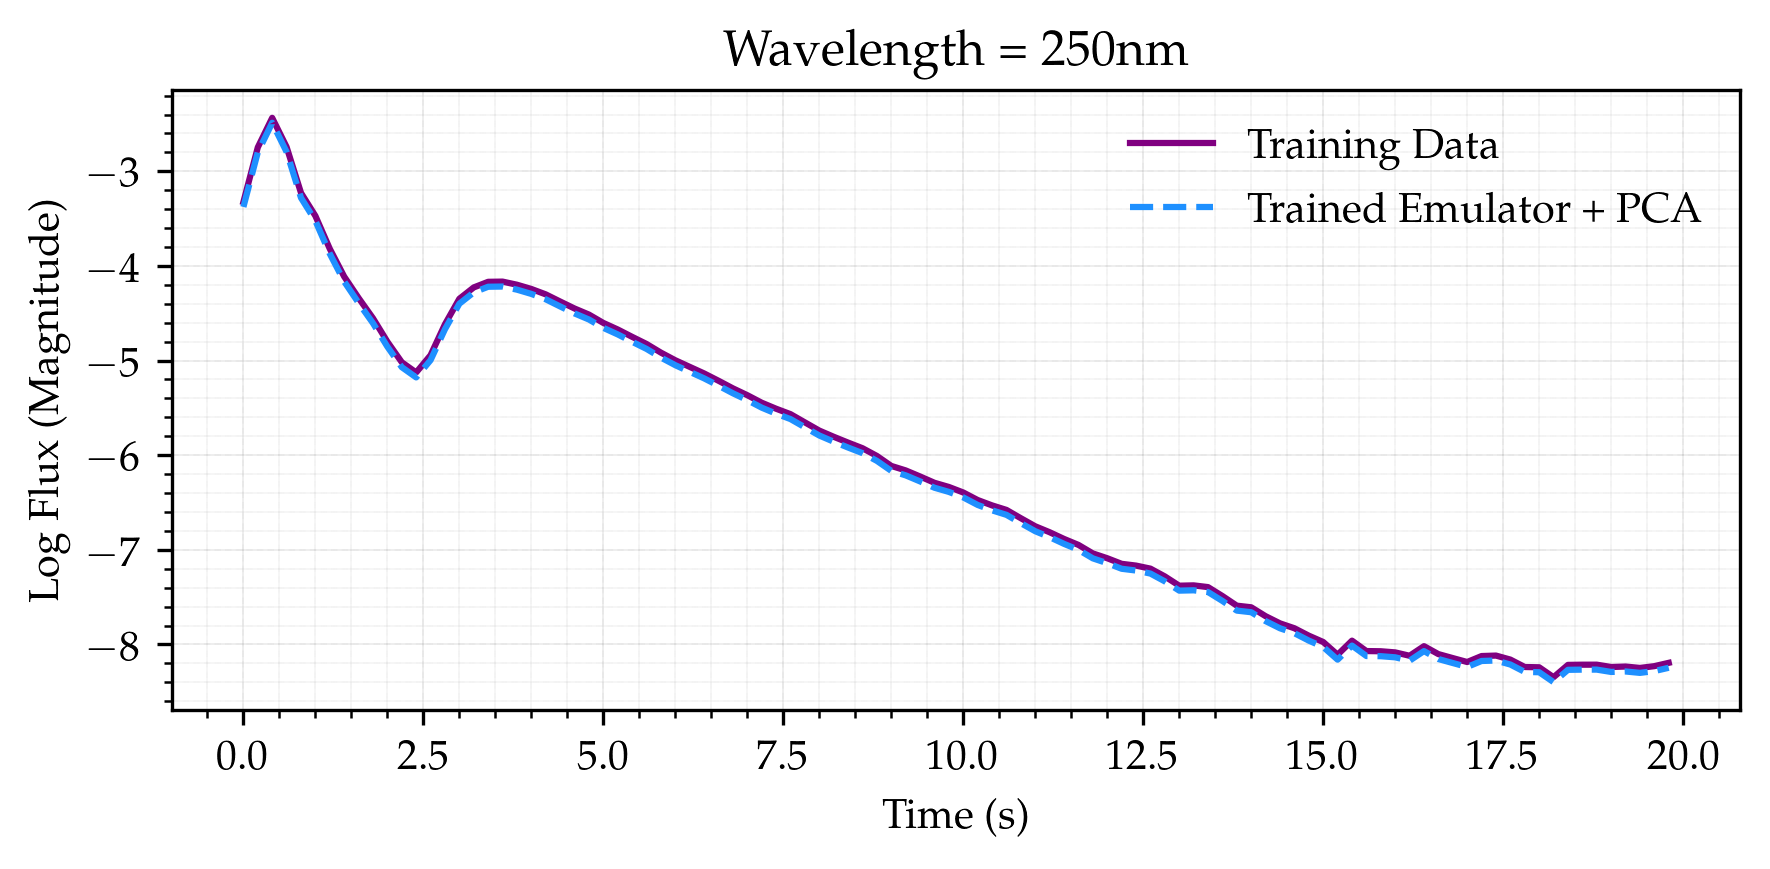

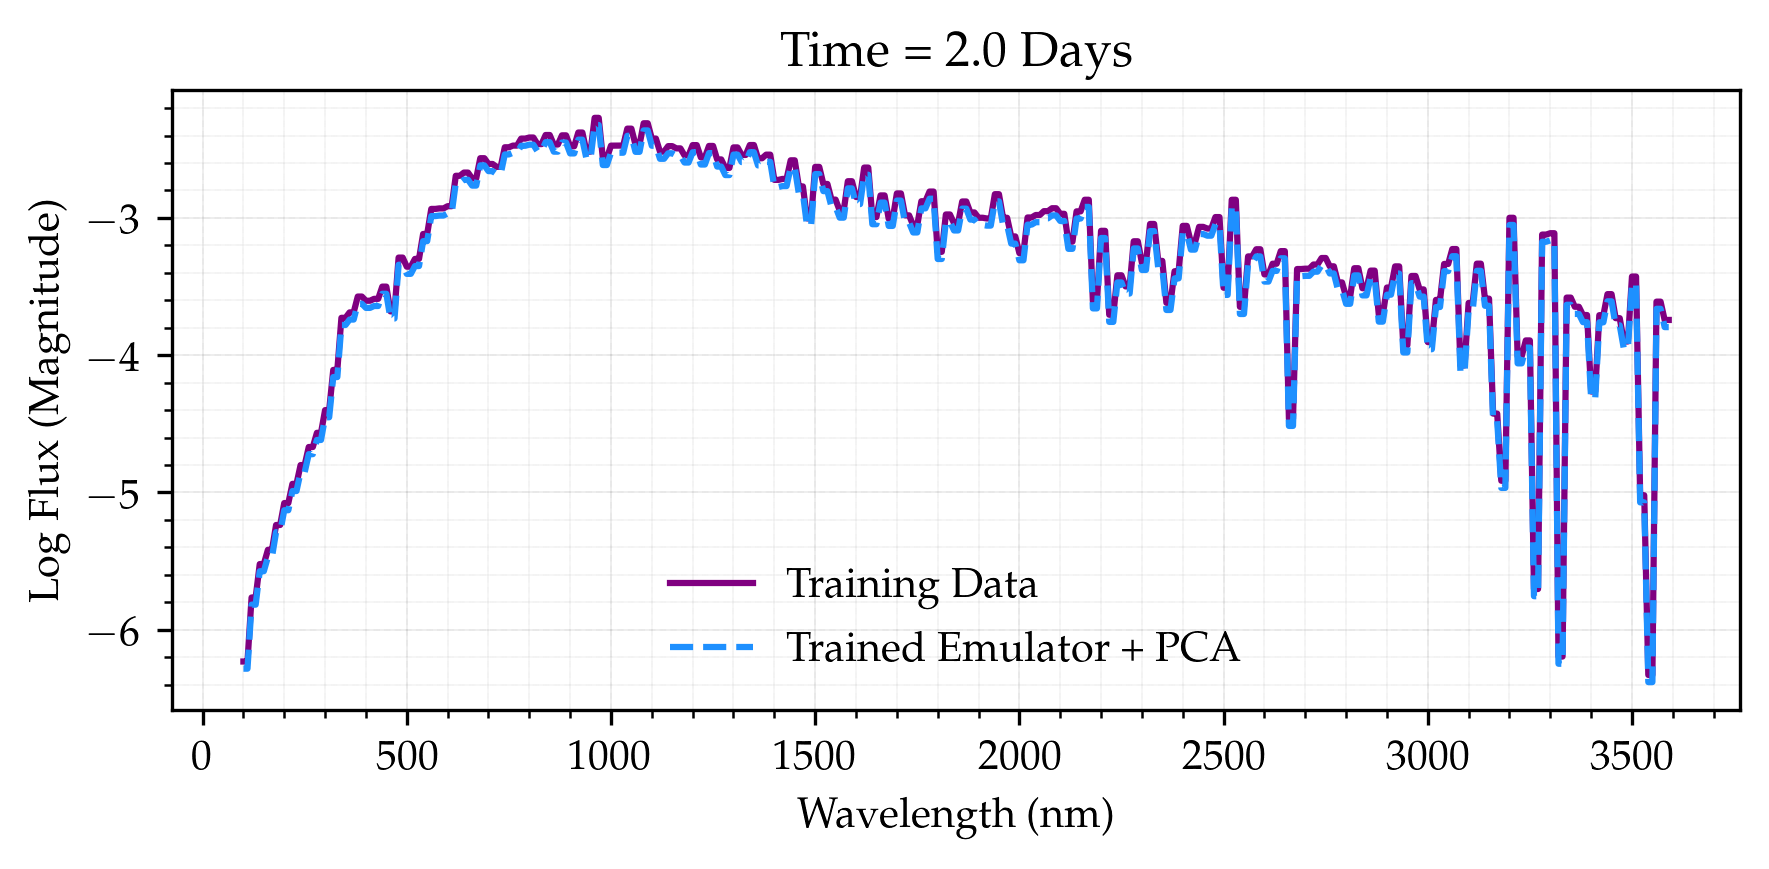

In [7]:
gp.plot_filters(mejdyn, mejwind, phi, iobs)
gp.get_flux(mejdyn, mejwind, phi, iobs, wv_desired = 250, time_desired = 2)
gp.overplot_time(mejdyn, mejwind, phi, iobs, wv_desired = 250)
gp.overplot_wavelength(mejdyn, mejwind, phi, iobs, time_desired = 2)
plt.show()

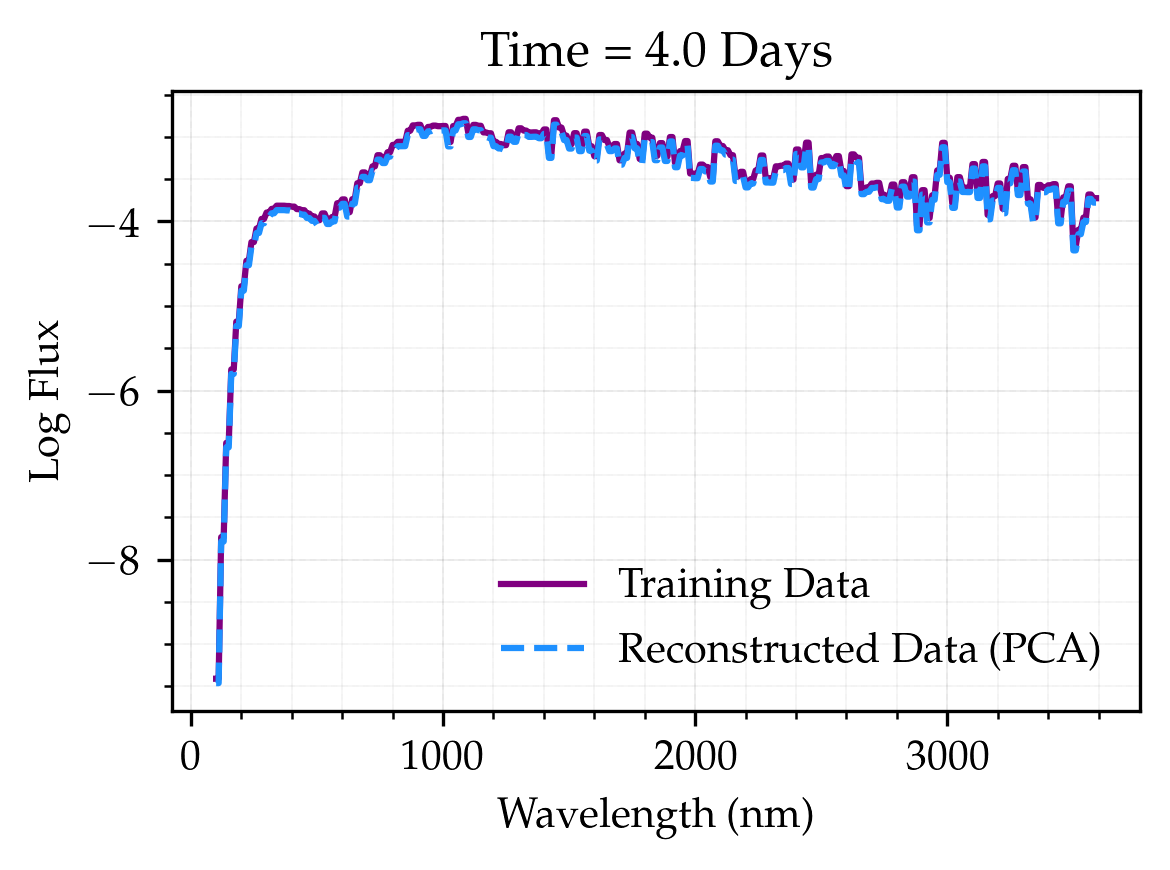

In [8]:
self = gp
time_desired = 4

t = self._t_helper()
time_index = (np.abs(t - time_desired)).argmin()  # Plot arbitary wavelength.
trained = np.load(f"data/pcaTrained/mejdyn{mejdyn}_mejwind{mejwind}_phi{phi}_iobs{iobs}.npy")

untrained = np.load(f"data/pca/mejdyn{mejdyn}_mejwind{mejwind}_phi{phi}_iobs{iobs}.npy")
untrained = self._untrained_helper(untrained)

plt.figure(dpi=300, figsize=(4, 3))
plt.title(f"Time = {round(t[time_index], 3)} Days")
plt.plot(self.wv_range, untrained[time_index, :], label="Training Data", color="purple")
plt.plot(self.wv_range, trained[time_index, :], label="Reconstructed Data (PCA)",
         linestyle="dashed", color="dodgerblue")
plt.legend()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Log Flux")
utkarshGrid()
plt.savefig("pca2.pdf")

In [ ]:
# print(f"PCA COMPONENTS: {gp.n_comp}")
# gp.plot_emulator_errors()

In [ ]:
# gp.plot_difference_histogram(binning = 150)
# plt.title("Error in only PCA Components (PCA Flux - Truth)/TRUTH")
# plt.xlabel("Units Log Flux (Error)")
# plt.ylabel("Count")
# plt.show()